In [7]:
import numpy as np
import os

from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector
from tensorflow_hub.module_v2 import load

from tflite_support import metadata

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

In [8]:
train_ds = object_detector.DataLoader.from_pascal_voc(
    './project-5-at-2023-03-14-03-12-92d31ec0/train',
    './project-5-at-2023-03-14-03-12-92d31ec0/train',
    ['banana', 'blackberry', 'blueberry', 'green_apple', 'lemon', 'passionfruit', 'raspberry', 'red_apple']
)

val_ds = object_detector.DataLoader.from_pascal_voc(
    './project-5-at-2023-03-14-03-12-92d31ec0/validate',
    './project-5-at-2023-03-14-03-12-92d31ec0/validate',
    ['banana', 'blackberry', 'blueberry', 'green_apple', 'lemon', 'passionfruit', 'raspberry', 'red_apple']
)

In [9]:
print(train_ds.size)
print(val_ds.size)

135
24


In [10]:
spec = model_spec.get('efficientdet_lite4')

In [12]:
model = object_detector.create(train_ds, model_spec=spec, batch_size=8, train_whole_model=True, epochs=20, validation_data=val_ds)

Epoch 1/20
16/16 [==============================] - 499s 28s/step - det_loss: 1.8412 - cls_loss: 1.2689 - box_loss: 0.0114 - reg_l2_loss: 0.1089 - loss: 1.9500 - learning_rate: 0.0090 - gradient_norm: 1.1390 - val_det_loss: 1.7533 - val_cls_loss: 1.2529 - val_box_loss: 0.0100 - val_reg_l2_loss: 0.1089 - val_loss: 1.8622
Epoch 2/20
16/16 [==============================] - 427s 27s/step - det_loss: 1.7186 - cls_loss: 1.2447 - box_loss: 0.0095 - reg_l2_loss: 0.1089 - loss: 1.8275 - learning_rate: 0.0098 - gradient_norm: 1.0812 - val_det_loss: 1.7008 - val_cls_loss: 1.2287 - val_box_loss: 0.0094 - val_reg_l2_loss: 0.1088 - val_loss: 1.8097
Epoch 3/20
16/16 [==============================] - 427s 27s/step - det_loss: 1.6553 - cls_loss: 1.2159 - box_loss: 0.0088 - reg_l2_loss: 0.1088 - loss: 1.7641 - learning_rate: 0.0096 - gradient_norm: 1.5811 - val_det_loss: 1.6163 - val_cls_loss: 1.1649 - val_box_loss: 0.0090 - val_reg_l2_loss: 0.1088 - val_loss: 1.7252
Epoch 4/20
16/16 [================

In [13]:
model.evaluate(train_ds)

3/3 [==============================] - 127s 29s/step



{'AP': 0.011964873,
 'AP50': 0.07340899,
 'AP75': 0.0007371639,
 'APs': -1.0,
 'APm': -1.0,
 'APl': 0.011964873,
 'ARmax1': 0.023092074,
 'ARmax10': 0.08909919,
 'ARmax100': 0.11342399,
 'ARs': -1.0,
 'ARm': -1.0,
 'ARl': 0.11342399,
 'AP_/banana': 0.028352298,
 'AP_/blackberry': 0.0012609925,
 'AP_/blueberry': 0.0002834036,
 'AP_/green_apple': 0.013638223,
 'AP_/lemon': 0.036305077,
 'AP_/passionfruit': 0.0062658326,
 'AP_/raspberry': 0.0040214765,
 'AP_/red_apple': 0.005591687}

In [14]:
model.evaluate(val_ds)

1/1 [==============================] - 28s 28s/step



{'AP': 0.03590918,
 'AP50': 0.14889061,
 'AP75': 0.0,
 'APs': -1.0,
 'APm': -1.0,
 'APl': 0.03590918,
 'ARmax1': 0.025,
 'ARmax10': 0.11625,
 'ARmax100': 0.13020833,
 'ARs': -1.0,
 'ARm': -1.0,
 'ARl': 0.13020833,
 'AP_/banana': 0.13049506,
 'AP_/blackberry': 0.008451093,
 'AP_/blueberry': 0.00052535866,
 'AP_/green_apple': 0.10509566,
 'AP_/lemon': 0.01503938,
 'AP_/passionfruit': 0.0026125514,
 'AP_/raspberry': 0.006930693,
 'AP_/red_apple': 0.018123642}

In [16]:
model.export(export_dir='../obj_model_training/', tflite_filename='fruits_efd_vla_bs8.tflite')

Exception ignored in: <function ScopedTFGraph.__del__ at 0x00000263FEA04430>
Traceback (most recent call last):
  File "c:\Users\Joshua\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\framework\c_api_util.py", line 55, in __del__
    self.deleter(self.graph)
AttributeError: deleter


In [17]:
model.evaluate_tflite('./fruits_efd_vla_bs8.tflite', train_ds)

135/135 [==============================] - 16438s 122s/step



{'AP': 0.016710898,
 'AP50': 0.097757615,
 'AP75': 9.0557834e-05,
 'APs': -1.0,
 'APm': -1.0,
 'APl': 0.016710898,
 'ARmax1': 0.024133742,
 'ARmax10': 0.09796594,
 'ARmax100': 0.14705278,
 'ARs': -1.0,
 'ARm': -1.0,
 'ARl': 0.14705278,
 'AP_/banana': 0.030345164,
 'AP_/blackberry': 0.0009060088,
 'AP_/blueberry': 0.00023436073,
 'AP_/green_apple': 0.018875852,
 'AP_/lemon': 0.052645776,
 'AP_/passionfruit': 0.01371826,
 'AP_/raspberry': 0.004874458,
 'AP_/red_apple': 0.012087307}

In [18]:
model.evaluate_tflite('./fruits_efd_vla_bs8.tflite', val_ds)

24/24 [==============================] - 2889s 120s/step



{'AP': 0.045571037,
 'AP50': 0.22353473,
 'AP75': 0.0,
 'APs': -1.0,
 'APm': -1.0,
 'APl': 0.045571037,
 'ARmax1': 0.025,
 'ARmax10': 0.135,
 'ARmax100': 0.15833333,
 'ARs': -1.0,
 'ARm': -1.0,
 'ARl': 0.15833333,
 'AP_/banana': 0.13118812,
 'AP_/blackberry': 0.014418559,
 'AP_/blueberry': 0.0,
 'AP_/green_apple': 0.13721873,
 'AP_/lemon': 0.018406412,
 'AP_/passionfruit': 0.0029814846,
 'AP_/raspberry': 0.005082508,
 'AP_/red_apple': 0.055272486}

In [ ]:

import platform
from typing import List, NamedTuple
import json

import cv2

Interpreter = tf.lite.Interpreter
load_delegate = tf.lite.experimental.load_delegate

# pylint: enable=g-import-not-at-top


class ObjectDetectorOptions(NamedTuple):
  """A config to initialize an object detector."""

  enable_edgetpu: bool = False
  """Enable the model to run on EdgeTPU."""

  label_allow_list: List[str] = None
  """The optional allow list of labels."""

  label_deny_list: List[str] = None
  """The optional deny list of labels."""

  max_results: int = -1
  """The maximum number of top-scored detection results to return."""

  num_threads: int = 1
  """The number of CPU threads to be used."""

  score_threshold: float = 0.0
  """The score threshold of detection results to return."""


class Rect(NamedTuple):
  """A rectangle in 2D space."""
  left: float
  top: float
  right: float
  bottom: float


class Category(NamedTuple):
  """A result of a classification task."""
  label: str
  score: float
  index: int


class Detection(NamedTuple):
  """A detected object as the result of an ObjectDetector."""
  bounding_box: Rect
  categories: List[Category]


def edgetpu_lib_name():
  """Returns the library name of EdgeTPU in the current platform."""
  return {
      'Darwin': 'libedgetpu.1.dylib',
      'Linux': 'libedgetpu.so.1',
      'Windows': 'edgetpu.dll',
  }.get(platform.system(), None)


class ObjectDetector:
  """A wrapper class for a TFLite object detection model."""

  _OUTPUT_LOCATION_NAME = 'location'
  _OUTPUT_CATEGORY_NAME = 'category'
  _OUTPUT_SCORE_NAME = 'score'
  _OUTPUT_NUMBER_NAME = 'number of detections'

  def __init__(
      self,
      model_path: str,
      options: ObjectDetectorOptions = ObjectDetectorOptions()
  ) -> None:
    """Initialize a TFLite object detection model.
    Args:
        model_path: Path to the TFLite model.
        options: The config to initialize an object detector. (Optional)
    Raises:
        ValueError: If the TFLite model is invalid.
        OSError: If the current OS isn't supported by EdgeTPU.
    """

    # Load metadata from model.
    displayer = metadata.MetadataDisplayer.with_model_file(model_path)

    # Save model metadata for preprocessing later.
    model_metadata = json.loads(displayer.get_metadata_json())
    process_units = model_metadata['subgraph_metadata'][0]['input_tensor_metadata'][0]['process_units']
    mean = 0.0
    std = 1.0
    for option in process_units:
      if option['options_type'] == 'NormalizationOptions':
        mean = option['options']['mean'][0]
        std = option['options']['std'][0]
    self._mean = mean
    self._std = std

    # Load label list from metadata.
    file_name = displayer.get_packed_associated_file_list()[0]
    label_map_file = displayer.get_associated_file_buffer(file_name).decode()
    label_list = list(filter(lambda x: len(x) > 0, label_map_file.splitlines()))
    self._label_list = label_list

    # Initialize TFLite model.
    if options.enable_edgetpu:
      if edgetpu_lib_name() is None:
        raise OSError("The current OS isn't supported by Coral EdgeTPU.")
      interpreter = Interpreter(
          model_path=model_path,
          experimental_delegates=[load_delegate(edgetpu_lib_name())],
          num_threads=options.num_threads)
    else:
      interpreter = Interpreter(
          model_path=model_path, num_threads=options.num_threads)

    interpreter.allocate_tensors()
    input_detail = interpreter.get_input_details()[0]

  
    sorted_output_indices = sorted(
        [output['index'] for output in interpreter.get_output_details()])
    self._output_indices = {
        self._OUTPUT_LOCATION_NAME: sorted_output_indices[0],
        self._OUTPUT_CATEGORY_NAME: sorted_output_indices[1],
        self._OUTPUT_SCORE_NAME: sorted_output_indices[2],
        self._OUTPUT_NUMBER_NAME: sorted_output_indices[3],
    }

    self._input_size = input_detail['shape'][2], input_detail['shape'][1]
    self._is_quantized_input = input_detail['dtype'] == np.uint8
    self._interpreter = interpreter
    self._options = options

  def detect(self, input_image: np.ndarray) -> List[Detection]:
    """Run detection on an input image.
    Args:
        input_image: A [height, width, 3] RGB image. Note that height and width
          can be anything since the image will be immediately resized according
          to the needs of the model within this function.
    Returns:
        A Person instance.
    """
    image_height, image_width, _ = input_image.shape

    input_tensor = self._preprocess(input_image)

    self._set_input_tensor(input_tensor)
    self._interpreter.invoke()

    # Get all output details
    boxes = self._get_output_tensor(self._OUTPUT_LOCATION_NAME)
    classes = self._get_output_tensor(self._OUTPUT_CATEGORY_NAME)
    scores = self._get_output_tensor(self._OUTPUT_SCORE_NAME)
    count = int(self._get_output_tensor(self._OUTPUT_NUMBER_NAME))

    return self._postprocess(boxes, classes, scores, count, image_width,
                             image_height)

  def _preprocess(self, input_image: np.ndarray) -> np.ndarray:
    """Preprocess the input image as required by the TFLite model."""

    # Resize the input
    input_tensor = cv2.resize(input_image, self._input_size)

    # Normalize the input if it's a float model (aka. not quantized)
    if not self._is_quantized_input:
      input_tensor = (np.float32(input_tensor) - self._mean) / self._std

    # Add batch dimension
    input_tensor = np.expand_dims(input_tensor, axis=0)

    return input_tensor

  def _set_input_tensor(self, image):
    """Sets the input tensor."""
    tensor_index = self._interpreter.get_input_details()[0]['index']
    input_tensor = self._interpreter.tensor(tensor_index)()[0]
    input_tensor[:, :] = image

  def _get_output_tensor(self, name):
    """Returns the output tensor at the given index."""
    output_index = self._output_indices[name]
    tensor = np.squeeze(self._interpreter.get_tensor(output_index))
    return tensor

  def _postprocess(self, boxes: np.ndarray, classes: np.ndarray,
                   scores: np.ndarray, count: int, image_width: int,
                   image_height: int) -> List[Detection]:
    """Post-process the output of TFLite model into a list of Detection objects.
    Args:
        boxes: Bounding boxes of detected objects from the TFLite model.
        classes: Class index of the detected objects from the TFLite model.
        scores: Confidence scores of the detected objects from the TFLite model.
        count: Number of detected objects from the TFLite model.
        image_width: Width of the input image.
        image_height: Height of the input image.
    Returns:
        A list of Detection objects detected by the TFLite model.
    """
    results = []

    # Parse the model output into a list of Detection entities.
    for i in range(count):
      if scores[i] >= self._options.score_threshold:
        y_min, x_min, y_max, x_max = boxes[i]
        bounding_box = Rect(
            top=int(y_min * image_height),
            left=int(x_min * image_width),
            bottom=int(y_max * image_height),
            right=int(x_max * image_width))
        class_id = int(classes[i])
        category = Category(
            score=scores[i],
            label=self._label_list[class_id],  # 0 is reserved for background
            index=class_id)
        result = Detection(bounding_box=bounding_box, categories=[category])
        results.append(result)

    # Sort detection results by score ascending
    sorted_results = sorted(
        results,
        key=lambda detection: detection.categories[0].score,
        reverse=True)

    # Filter out detections in deny list
    filtered_results = sorted_results
    if self._options.label_deny_list is not None:
      filtered_results = list(
          filter(
              lambda detection: detection.categories[0].label not in self.
              _options.label_deny_list, filtered_results))

    # Keep only detections in allow list
    if self._options.label_allow_list is not None:
      filtered_results = list(
          filter(
              lambda detection: detection.categories[0].label in self._options.
              label_allow_list, filtered_results))

    # Only return maximum of max_results detection.
    if self._options.max_results > 0:
      result_count = min(len(filtered_results), self._options.max_results)
      filtered_results = filtered_results[:result_count]

    return filtered_results


_MARGIN = 10  # pixels
_ROW_SIZE = 10  # pixels
_FONT_SIZE = 1
_FONT_THICKNESS = 1
_TEXT_COLOR = (0, 0, 255)  # red


def visualize(
    image: np.ndarray,
    detections: List[Detection],
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detections: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  for detection in detections:
    # Draw bounding_box
    start_point = detection.bounding_box.left, detection.bounding_box.top
    end_point = detection.bounding_box.right, detection.bounding_box.bottom
    cv2.rectangle(image, start_point, end_point, _TEXT_COLOR, 3)

    # Draw label and score
    category = detection.categories[0]
    class_name = category.label
    probability = round(category.score, 2)
    result_text = class_name + ' (' + str(probability) + ')'
    text_location = (_MARGIN + detection.bounding_box.left,
                     _MARGIN + _ROW_SIZE + detection.bounding_box.top)
    cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                _FONT_SIZE, _TEXT_COLOR, _FONT_THICKNESS)

  return image

C:\Users\joshu\AppData\Local\Temp\ipykernel_16372\70410417.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image.thumbnail((512, 512), Image.ANTIALIAS)


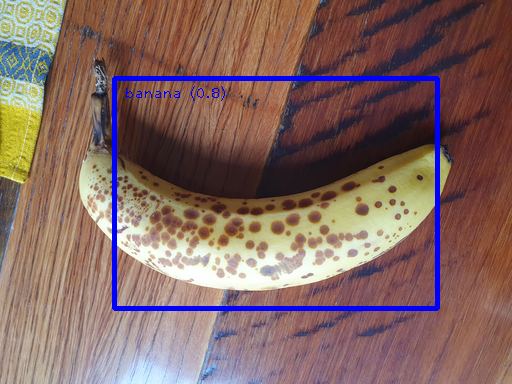

In [ ]:


from PIL import Image

INPUT_IMAGE_URL = "./fruit_photos/banana/20230228_172559.jpg" 
DETECTION_THRESHOLD = 0.5 
TFLITE_MODEL_PATH = "./SSD_efficientDet_lite4.tflite" 

TEMP_FILE = '/tmp/image.png'


image = Image.open(INPUT_IMAGE_URL).convert('RGB')
image.thumbnail((512, 512), Image.ANTIALIAS)
image_np = np.asarray(image)

# Load the TFLite model
options = ObjectDetectorOptions(
      num_threads=4,
      score_threshold=DETECTION_THRESHOLD,
)
detector = ObjectDetector(model_path=TFLITE_MODEL_PATH, options=options)

# Run object detection estimation using the model.
detections = detector.detect(image_np)

# Draw keypoints and edges on input image
image_np = visualize(image_np, detections)

# Show the detection result
Image.fromarray(image_np)

C:\Users\joshu\AppData\Local\Temp\ipykernel_16372\3572975763.py:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image.thumbnail((512, 512), Image.ANTIALIAS)


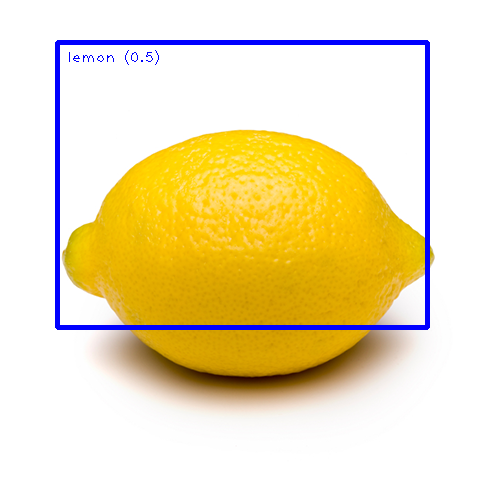

In [ ]:
from PIL import Image

INPUT_IMAGE_URL = "https://lemonsforlife.com/wp-content/uploads/bfi_thumb/Eureka-Lemons-npvwmj5okw1uxtdefut5oh5g529vrogfpx1os2rfd4-npx1b0nanetlqc4hvdyozf2f1y0devd3eg6vd1cqyw.png" 
DETECTION_THRESHOLD = 0.5 
TFLITE_MODEL_PATH = "./SSD_efficientDet_lite4.tflite" 

TEMP_FILE = '../Demo/Test_Img/Eureka-Lemons-npvwmj5okw1uxtdefut5oh5g529vrogfpx1os2rfd4-npx1b0nanetlqc4hvdyozf2f1y0devd3eg6vd1cqyw.png'


image = Image.open(TEMP_FILE).convert('RGB')
image.thumbnail((512, 512), Image.ANTIALIAS)
image_np = np.asarray(image)

# Load the TFLite model
options = ObjectDetectorOptions(
      num_threads=4,
      score_threshold=DETECTION_THRESHOLD,
)
detector = ObjectDetector(model_path=TFLITE_MODEL_PATH, options=options)

# Run object detection estimation using the model.
detections = detector.detect(image_np)

# Draw keypoints and edges on input image
image_np = visualize(image_np, detections)

# Show the detection result
Image.fromarray(image_np)